In [1]:
import os
import pandas as pd
os.chdir("../")

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("data/training_data.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.columns = train.columns.str.lower().str.replace(' ', '_')

# string columns
string_columns = list(train.dtypes[train.dtypes == 'object'].index)

# numerical columns
num_columns = list(train.dtypes[train.dtypes != 'object'].index)

# iterating though string columns
for col in string_columns:
    # Convert all text in the current string column to lowercase and replace spaces with underscores
    train[col] = train[col].str.lower().str.replace(' ', '_')

In [7]:
train.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [9]:
train.isnull().sum()/len(train)

item_identifier              0.000000
item_weight                  0.171653
item_fat_content             0.000000
item_visibility              0.000000
item_type                    0.000000
item_mrp                     0.000000
outlet_identifier            0.000000
outlet_establishment_year    0.000000
outlet_size                  0.282764
outlet_location_type         0.000000
outlet_type                  0.000000
item_outlet_sales            0.000000
dtype: float64

**Observation -** 
- item_weight has 17% null values
- outler_size has 28% null values


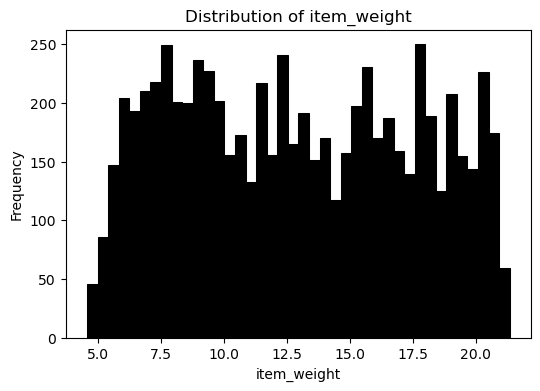

In [10]:
# generating histogram plot of item_weight feature 
plt.figure(figsize=(6, 4))

sns.histplot(train.item_weight, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('item_weight')
plt.title('Distribution of item_weight')

plt.show()

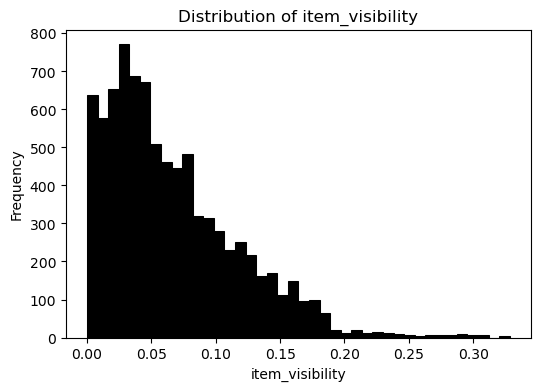

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(train.item_visibility, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('item_visibility')
plt.title('Distribution of item_visibility')

plt.show()

**Observation -** 
- Most item have visibility less than 5%-6%

In [12]:
for col in string_columns:
    print(f"{col} - {train[col].nunique()}")

item_identifier - 1559
item_fat_content - 4
item_type - 16
outlet_identifier - 10
outlet_size - 3
outlet_location_type - 3
outlet_type - 4


In [13]:
for col in string_columns:
    print(col,'-',train[col].unique())for col in string_columns:
    print(col,'-',train[col].unique())

SyntaxError: invalid syntax (1776694831.py, line 2)

In [14]:
# Replace 'lf' with 'low_fat'
train['item_fat_content'].replace('lf', 'low_fat', inplace=True)

# Replace 'reg' with 'regular'
train['item_fat_content'].replace('reg', 'regular', inplace=True)

In [15]:
for col in string_columns:
    print(col,'-',train[col].unique())

item_identifier - ['fda15' 'drc01' 'fdn15' ... 'ncf55' 'ncw30' 'ncw05']
item_fat_content - ['low_fat' 'regular']
item_type - ['dairy' 'soft_drinks' 'meat' 'fruits_and_vegetables' 'household'
 'baking_goods' 'snack_foods' 'frozen_foods' 'breakfast'
 'health_and_hygiene' 'hard_drinks' 'canned' 'breads' 'starchy_foods'
 'others' 'seafood']
outlet_identifier - ['out049' 'out018' 'out010' 'out013' 'out027' 'out045' 'out017' 'out046'
 'out035' 'out019']
outlet_size - ['medium' nan 'high' 'small']
outlet_location_type - ['tier_1' 'tier_3' 'tier_2']
outlet_type - ['supermarket_type1' 'supermarket_type2' 'grocery_store'
 'supermarket_type3']


**converting**

- fda15 -> fd (where fd means *food*)
- drc01 -> dr (where dr means *drink*)
- ncf55 -> nc (where nc means *non consumable*)

In [16]:
train['item_identifier'] = train['item_identifier'].apply(lambda x : x[:2])

In [17]:
train['item_identifier'].unique()

array(['fd', 'dr', 'nc'], dtype=object)

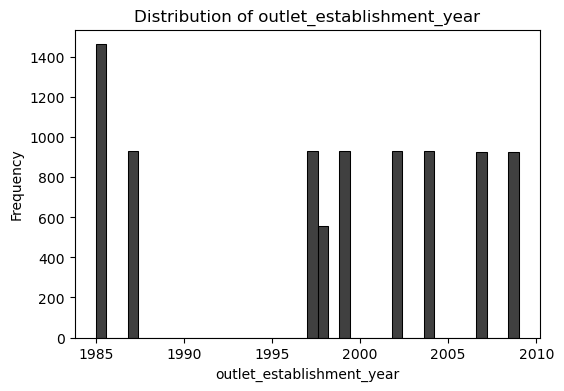

In [18]:
plt.figure(figsize=(6, 4))

sns.histplot(train.outlet_establishment_year, bins=40, color='black')
plt.ylabel('Frequency')
plt.xlabel('outlet_establishment_year')
plt.title('Distribution of outlet_establishment_year')

plt.show()

In [19]:
train.outlet_establishment_year.max(),train.outlet_establishment_year.min()

(2009, 1985)

In [20]:
train['outlet_age'] = 2018 - train.outlet_establishment_year
train.drop(columns=['outlet_establishment_year'],inplace = True)

In [21]:
for item_identifier in train['item_identifier'].unique():
    print(item_identifier,train[train['item_identifier']==item_identifier]['item_type'].unique())

fd ['dairy' 'meat' 'fruits_and_vegetables' 'baking_goods' 'snack_foods'
 'frozen_foods' 'breakfast' 'canned' 'breads' 'starchy_foods' 'seafood']
dr ['soft_drinks' 'hard_drinks' 'dairy']
nc ['household' 'health_and_hygiene' 'others']


In [22]:
train.isnull().sum()

item_identifier            0
item_weight             1463
item_fat_content           0
item_visibility            0
item_type                  0
item_mrp                   0
outlet_identifier          0
outlet_size             2410
outlet_location_type       0
outlet_type                0
item_outlet_sales          0
outlet_age                 0
dtype: int64

In [23]:
train.item_fat_content.unique()

array(['low_fat', 'regular'], dtype=object)

In [24]:
train.loc[train['item_identifier']=="nc",'item_fat_content']='not_edible'

In [25]:
train.item_fat_content.unique()

array(['low_fat', 'regular', 'not_edible'], dtype=object)

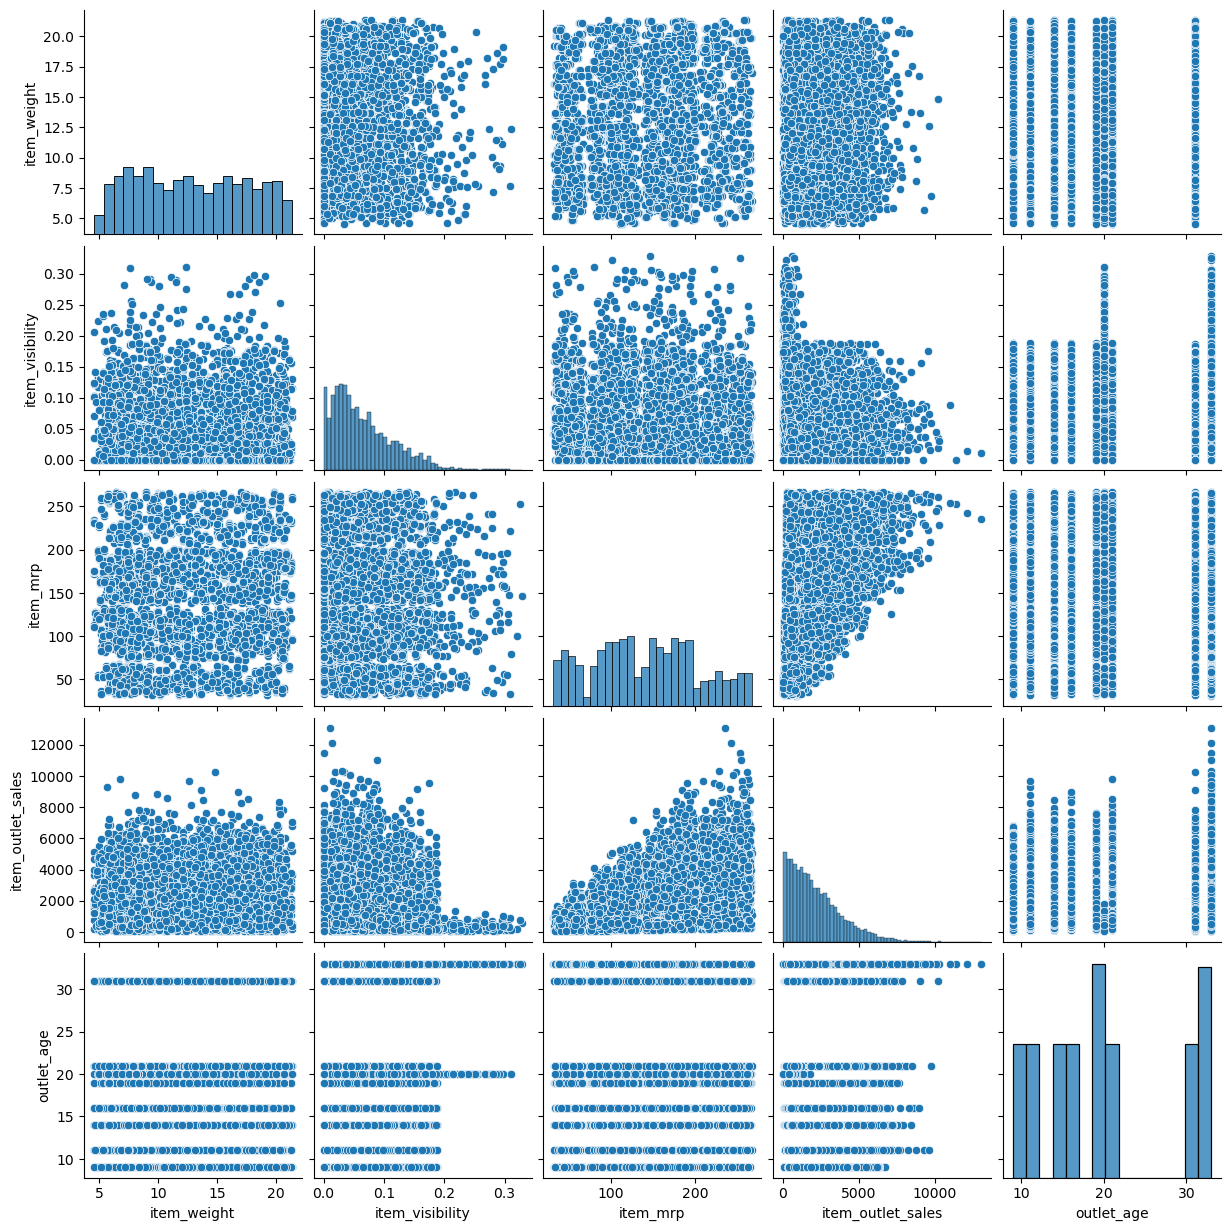

In [26]:
sns.pairplot(train)

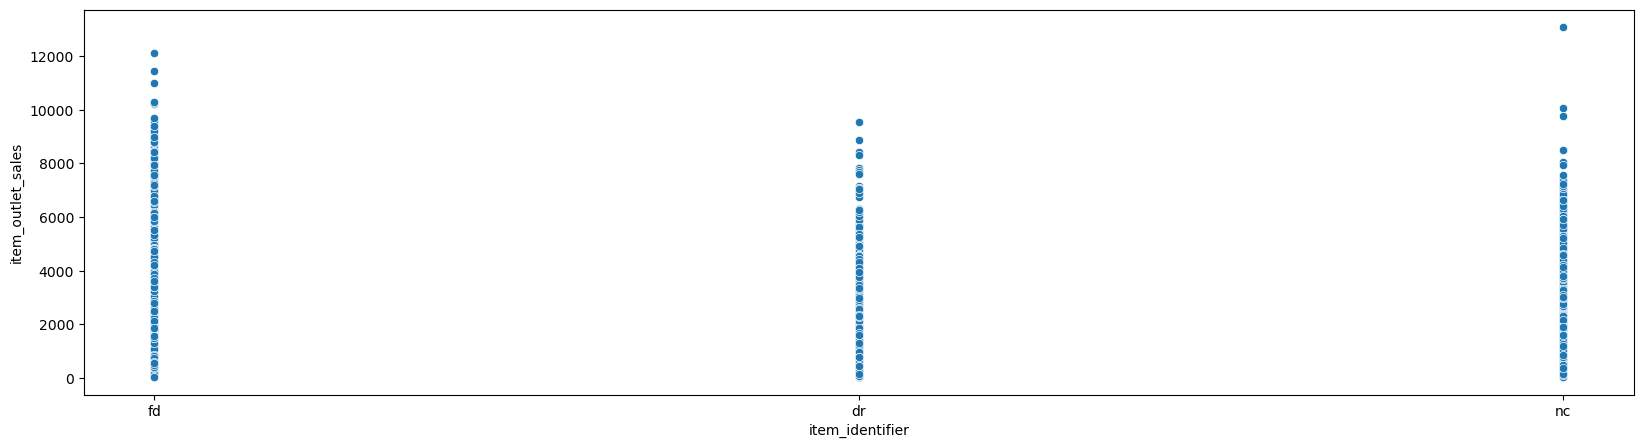

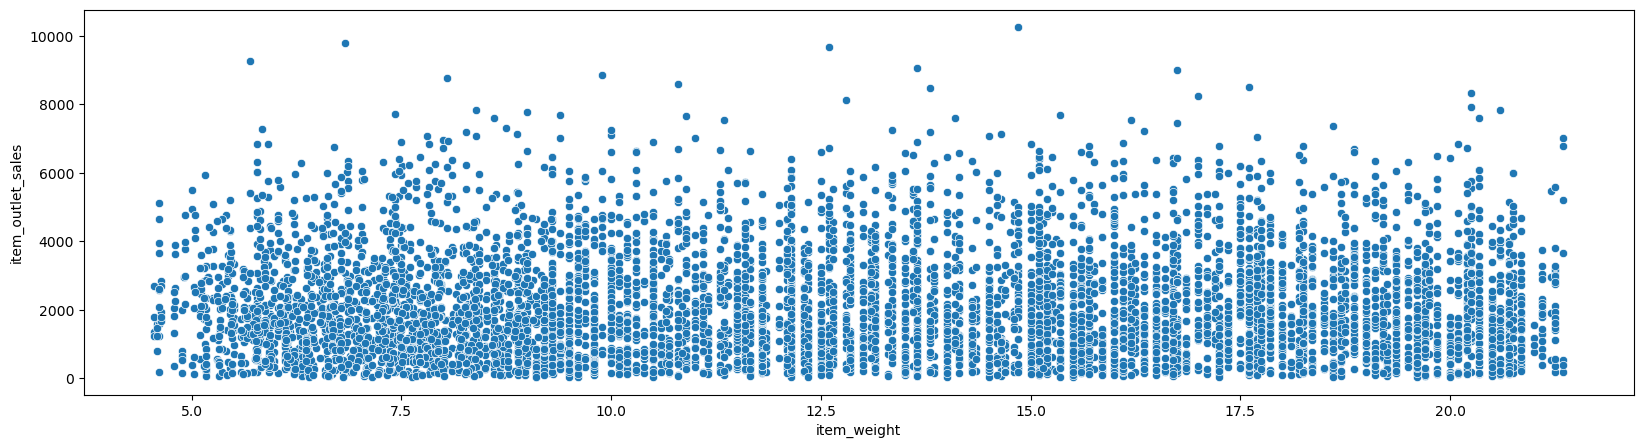

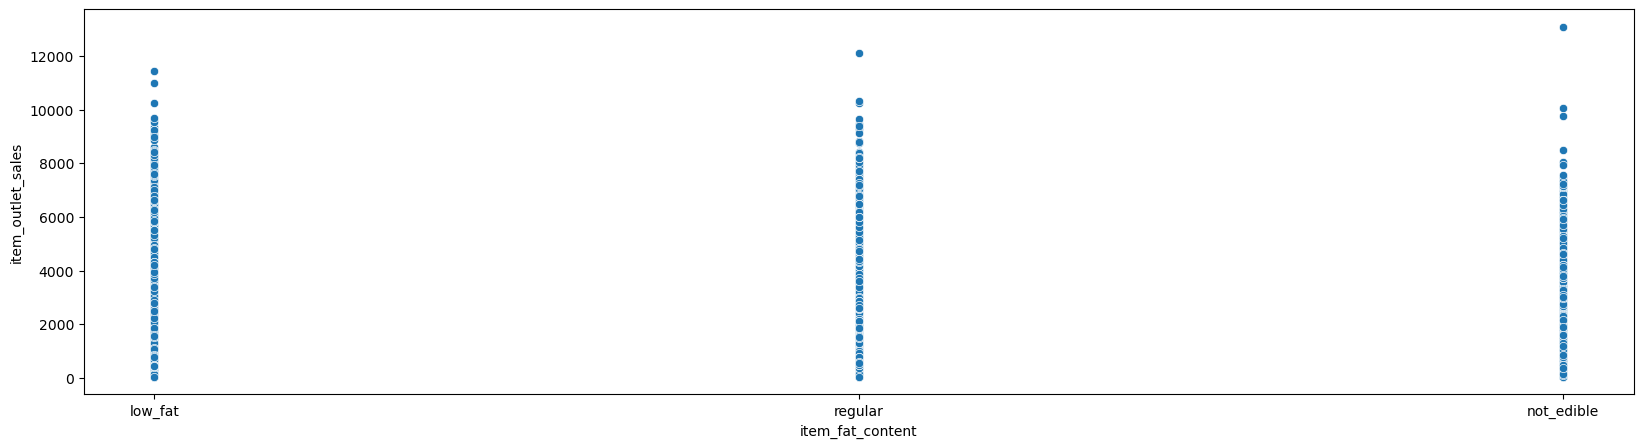

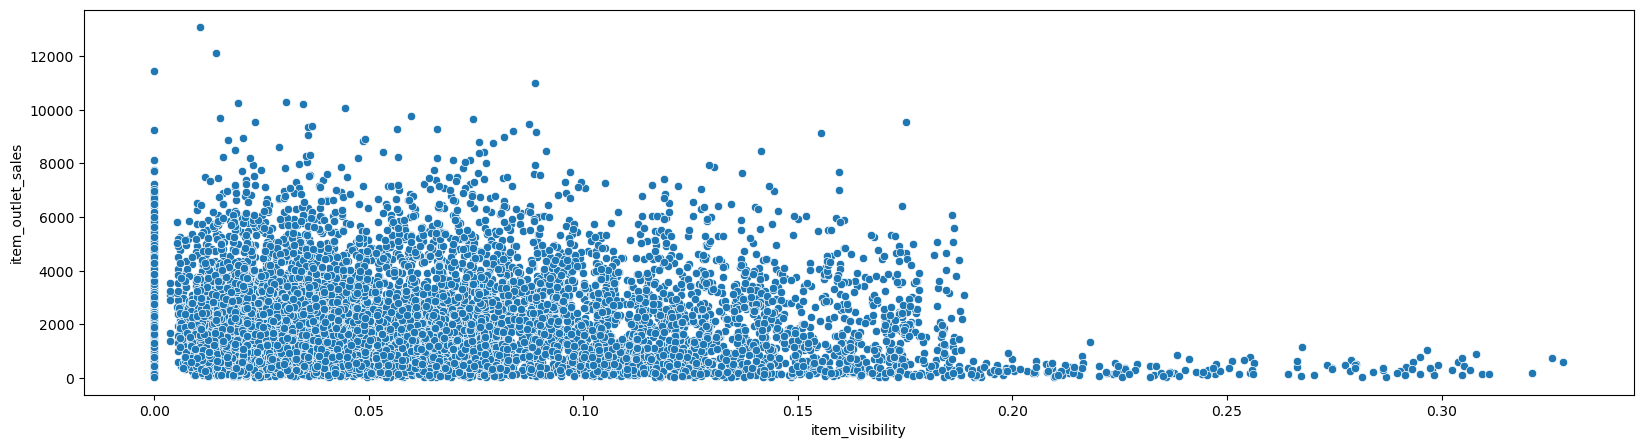

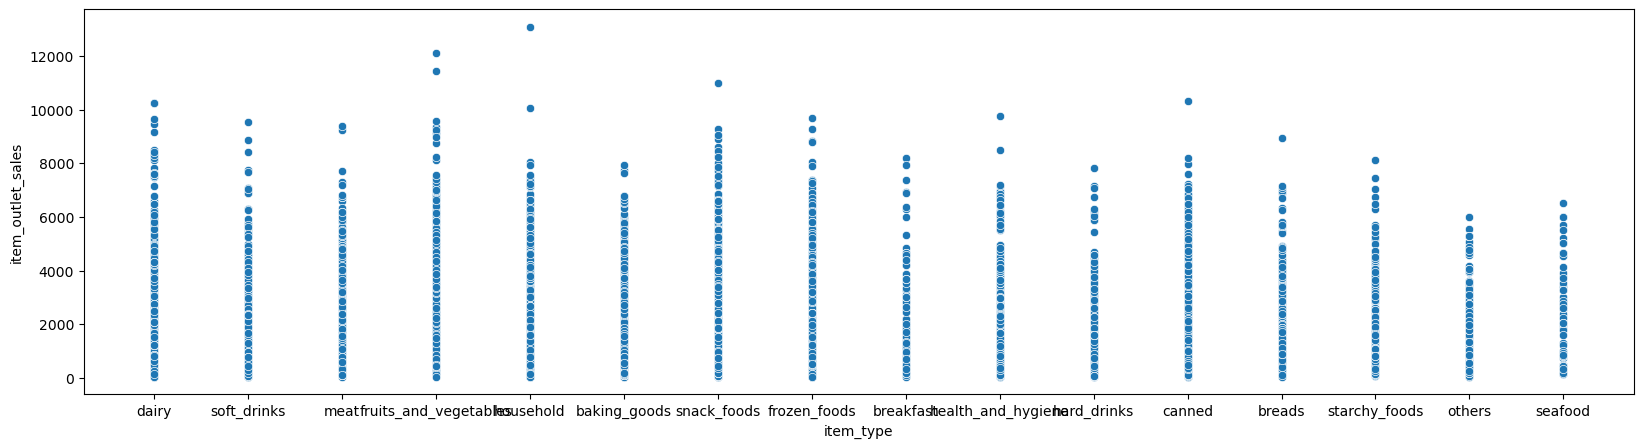

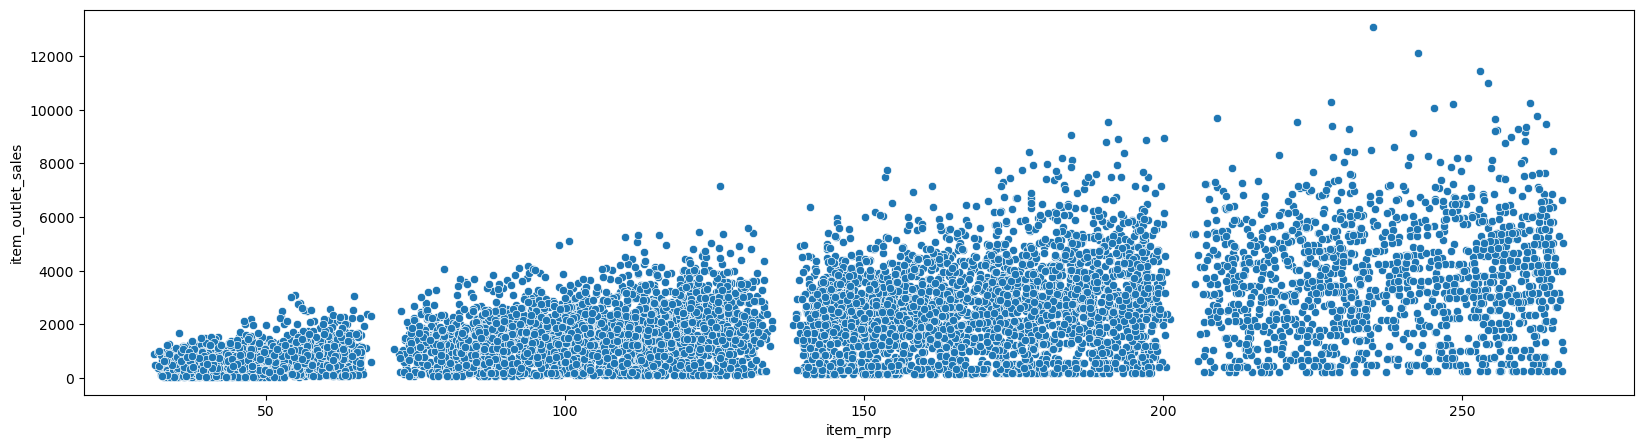

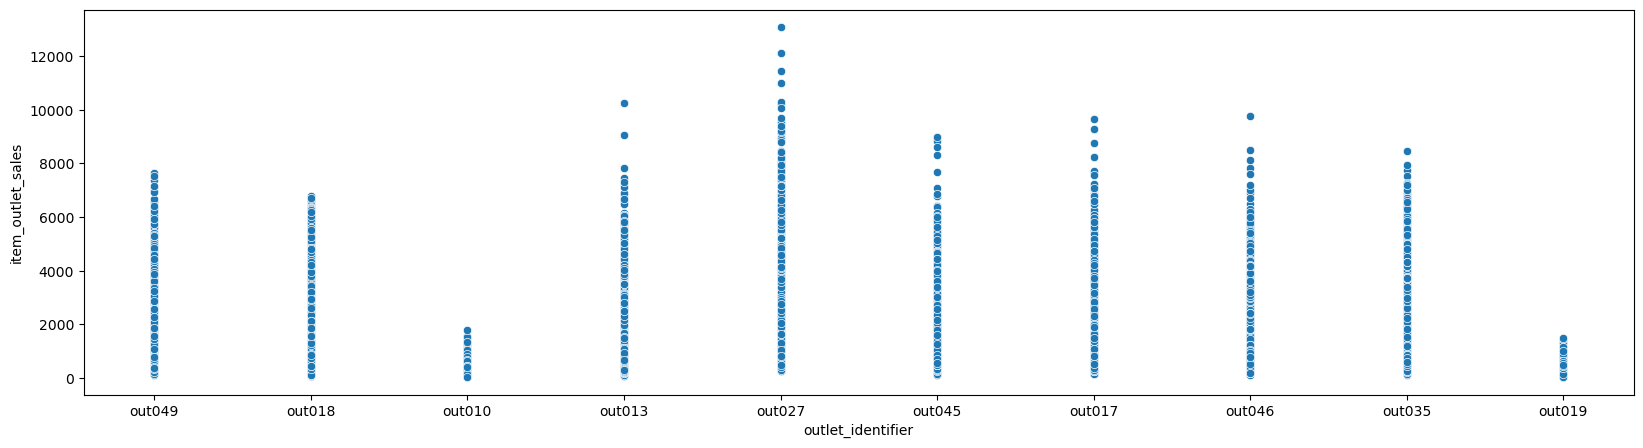

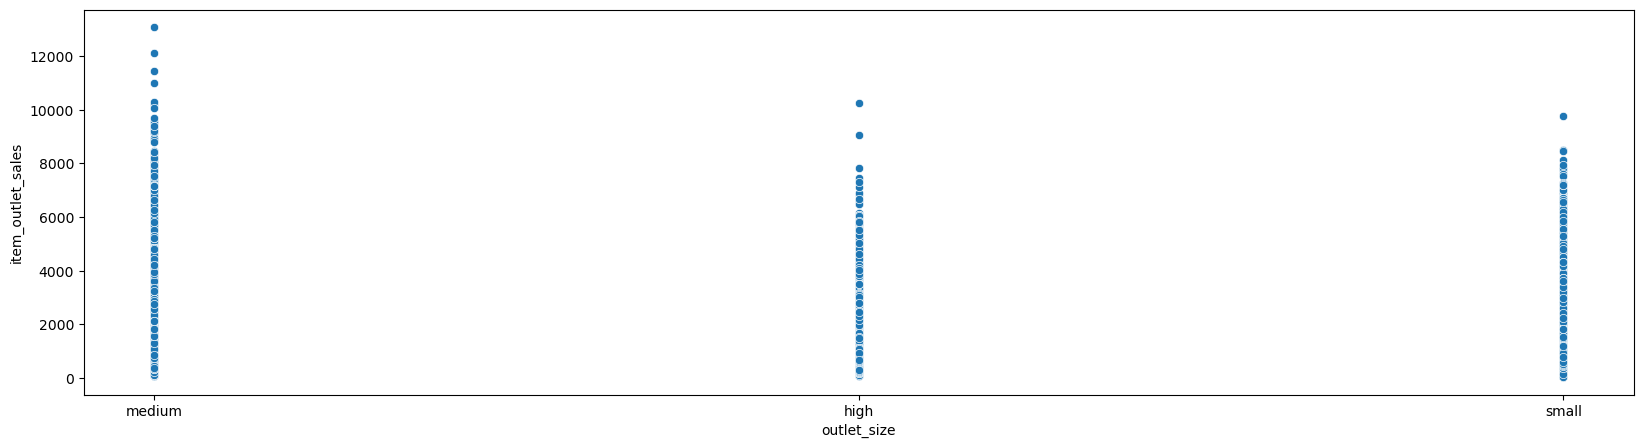

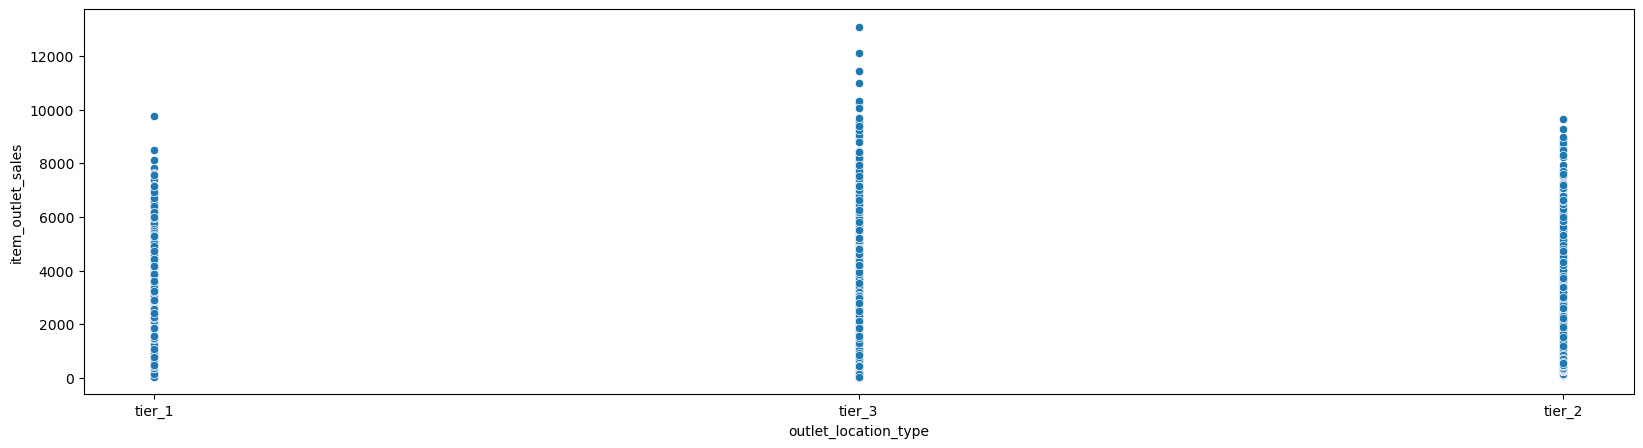

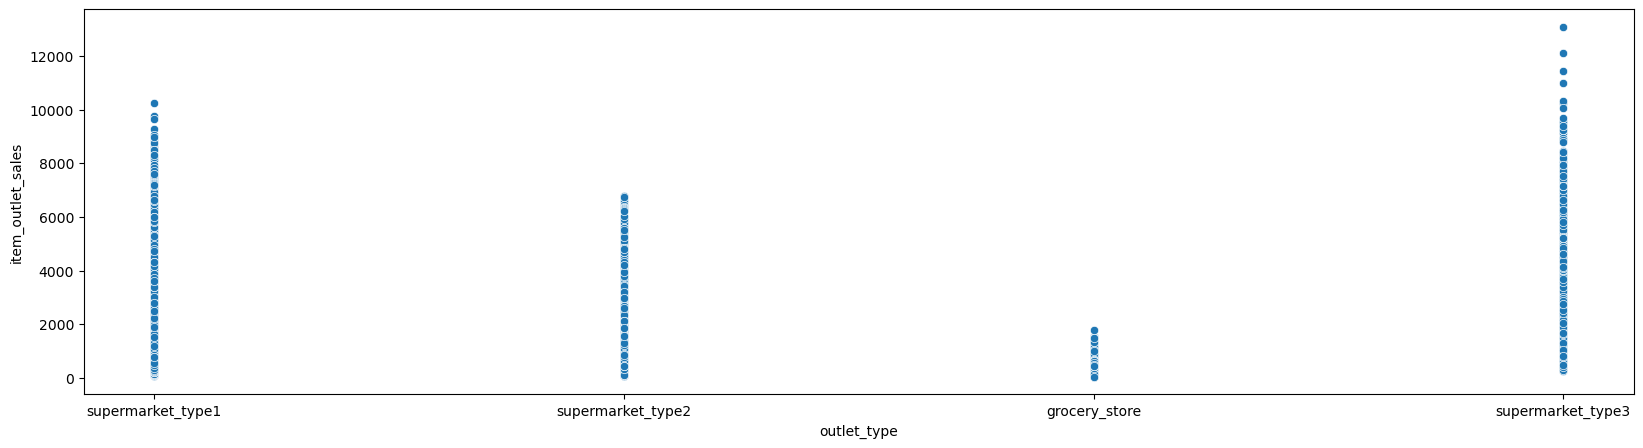

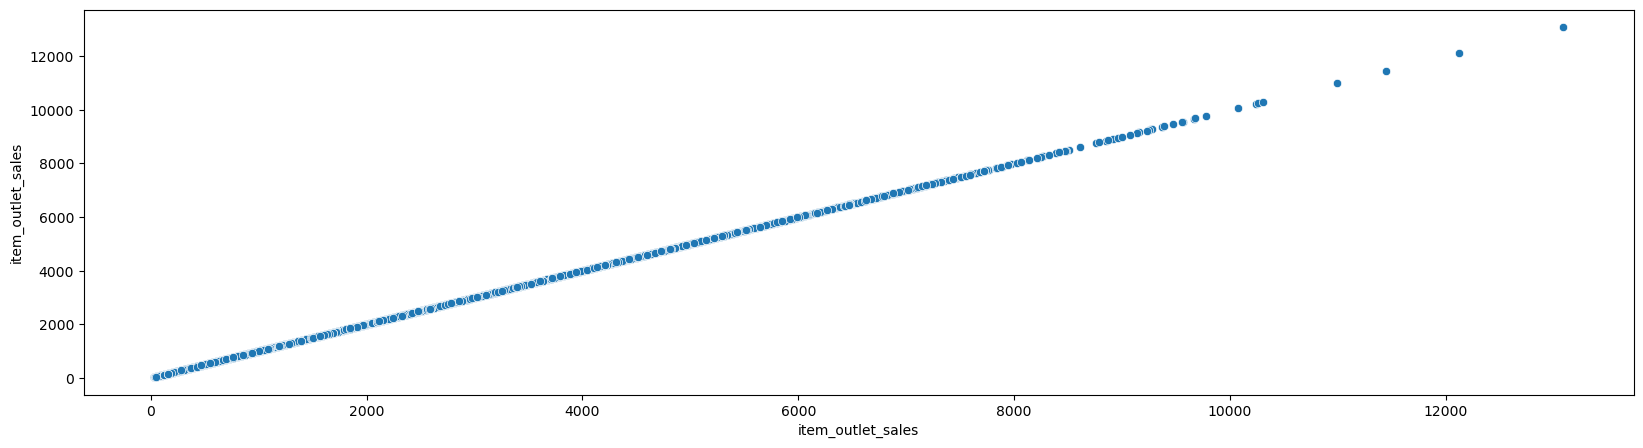

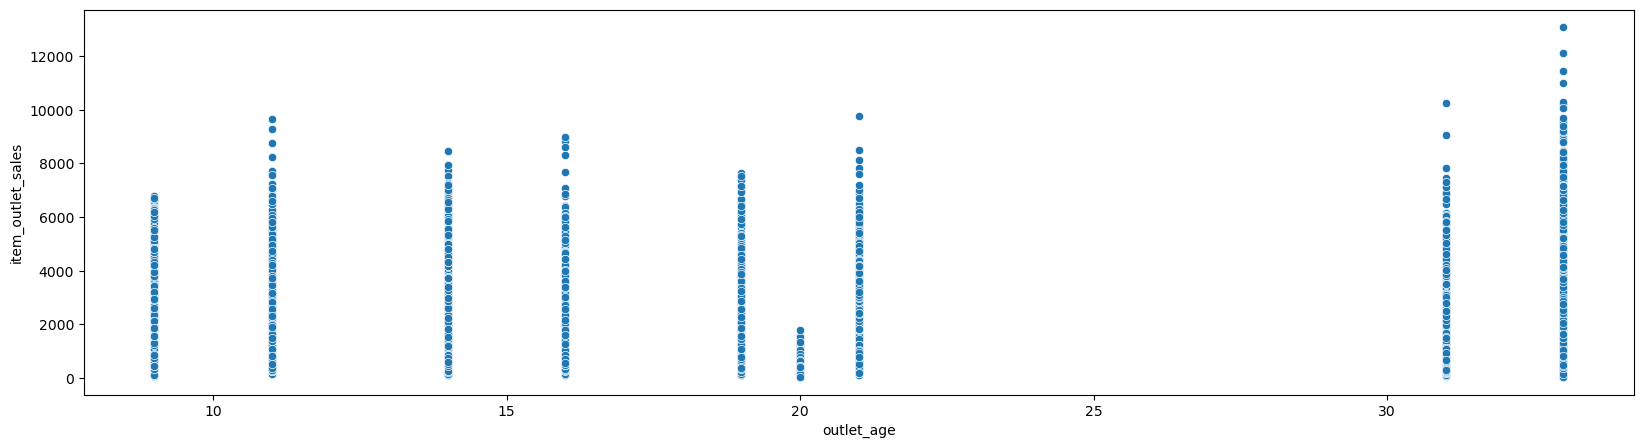

In [27]:
for column in train.columns:
    plt.figure(figsize=(20,5))
    sns.scatterplot(data=train, x=column, y='item_outlet_sales')
    plt.show()

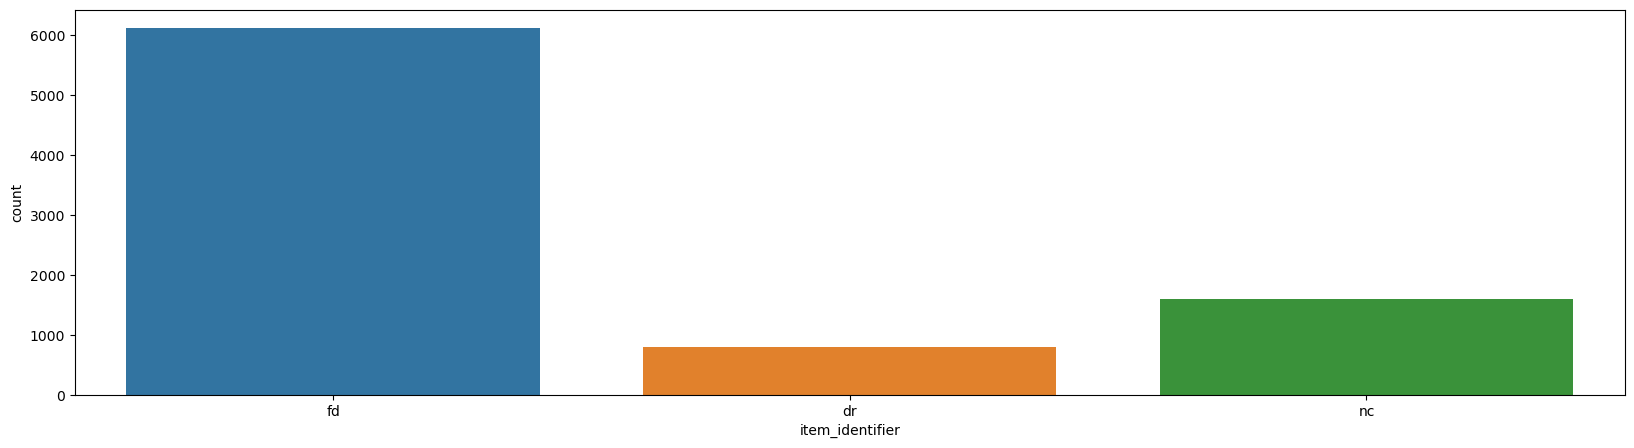

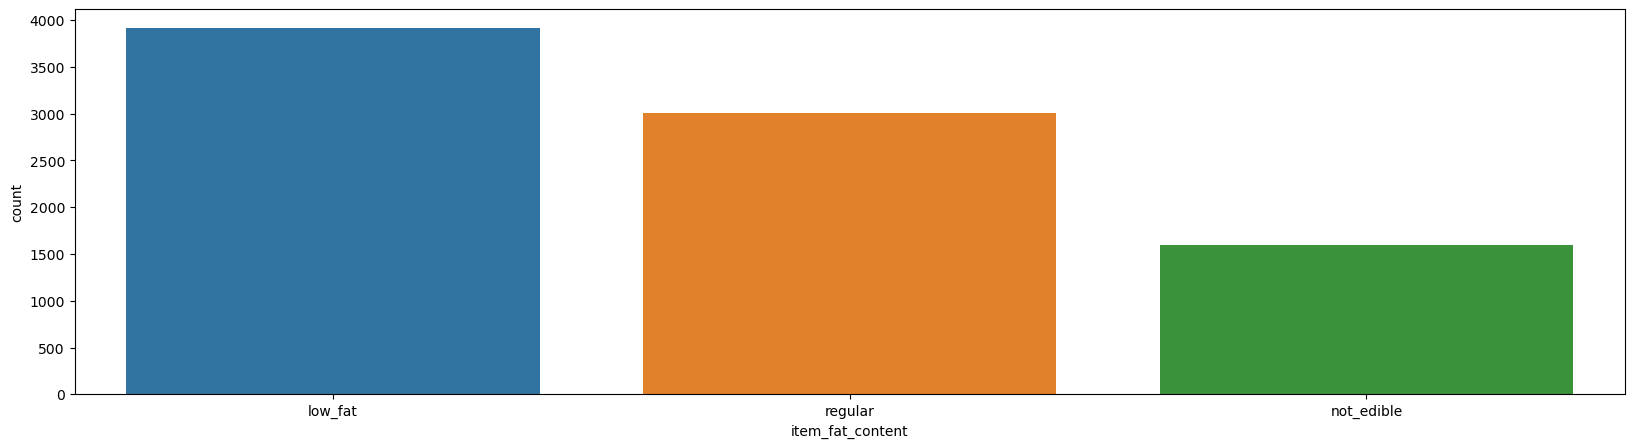

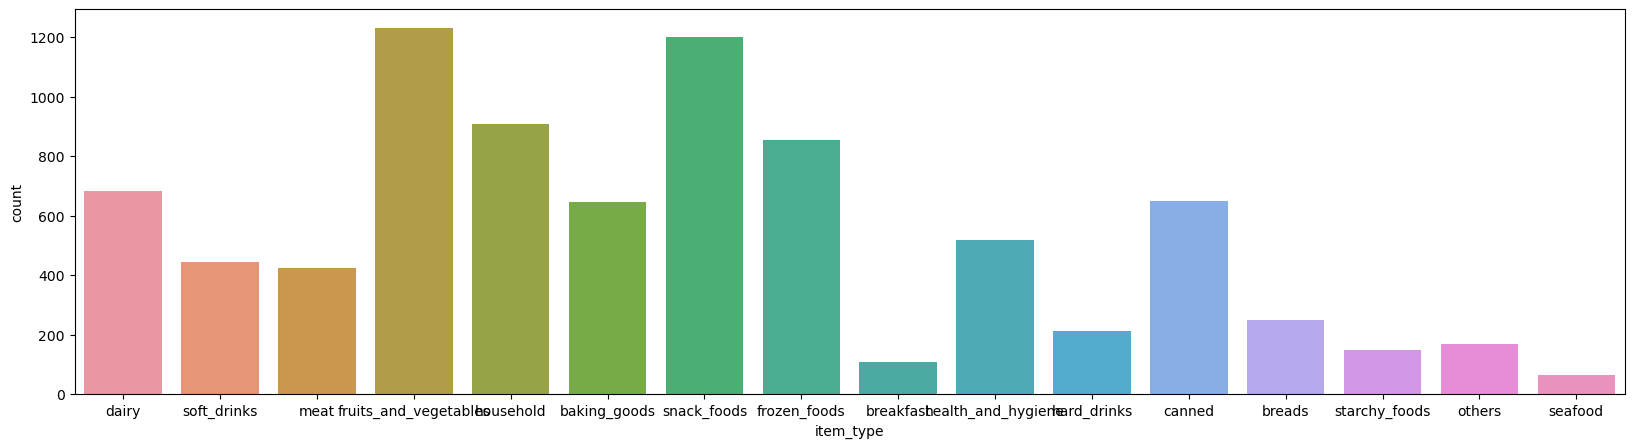

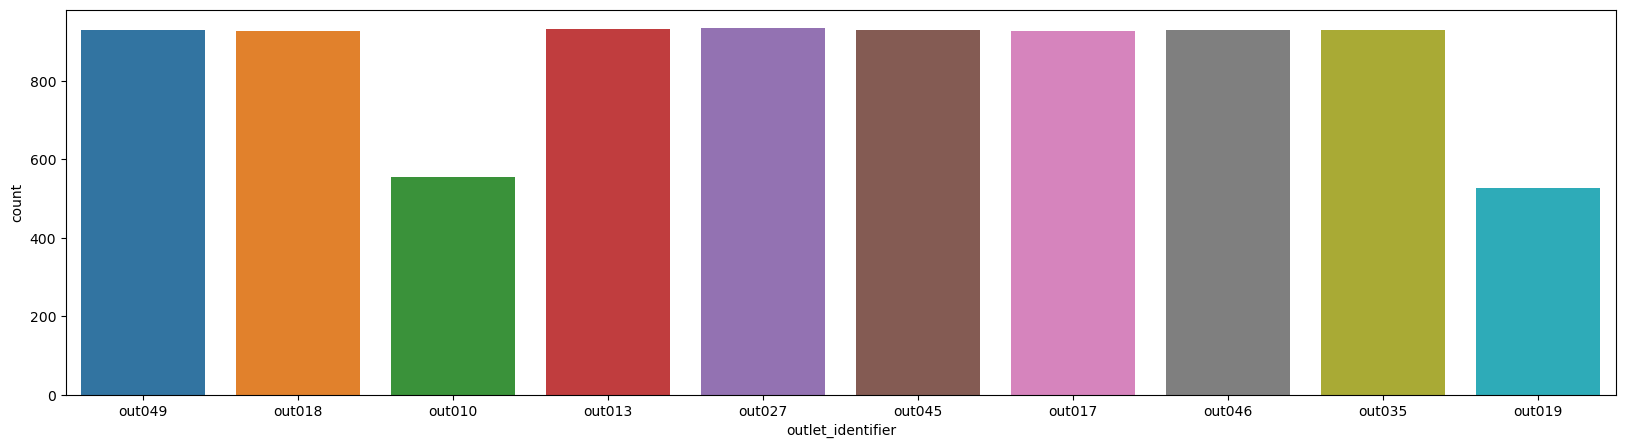

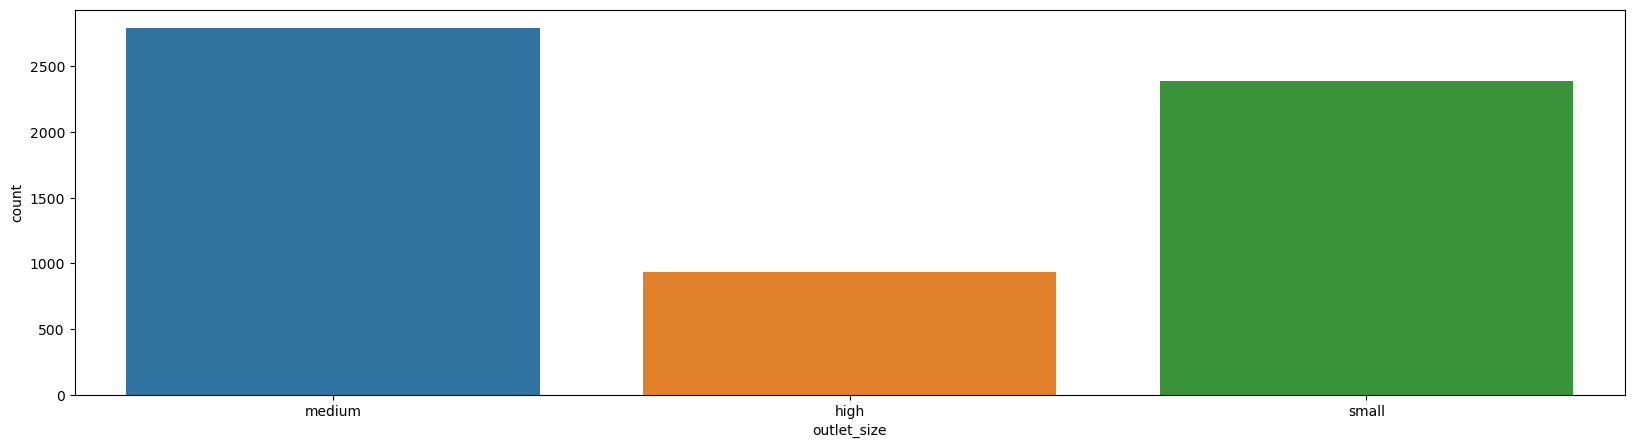

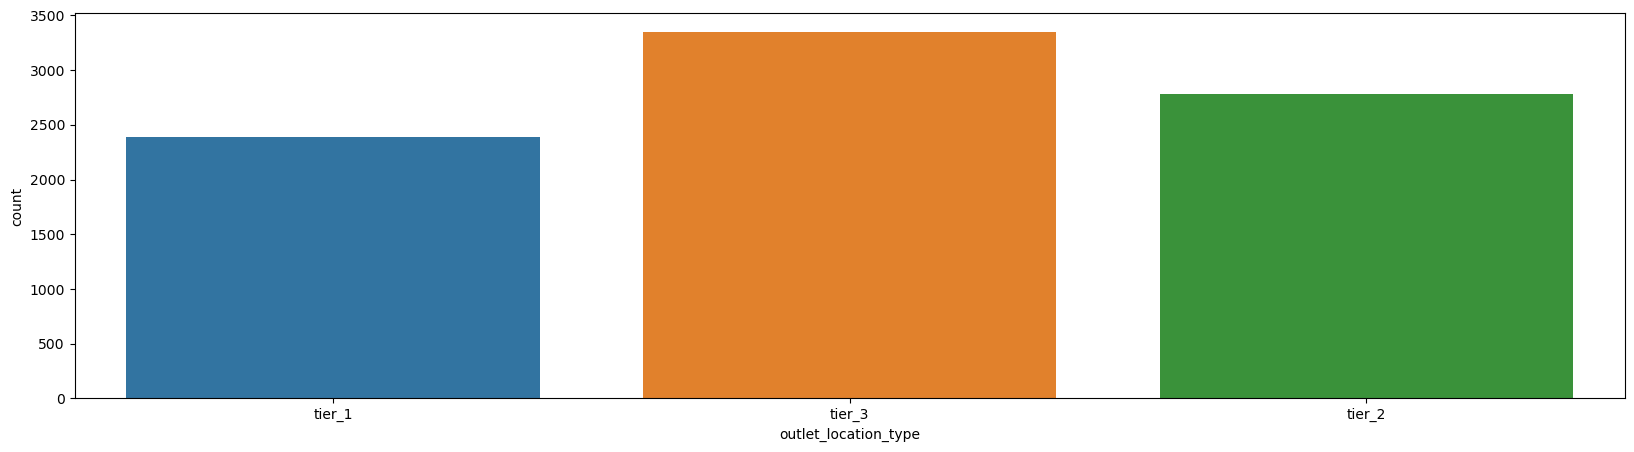

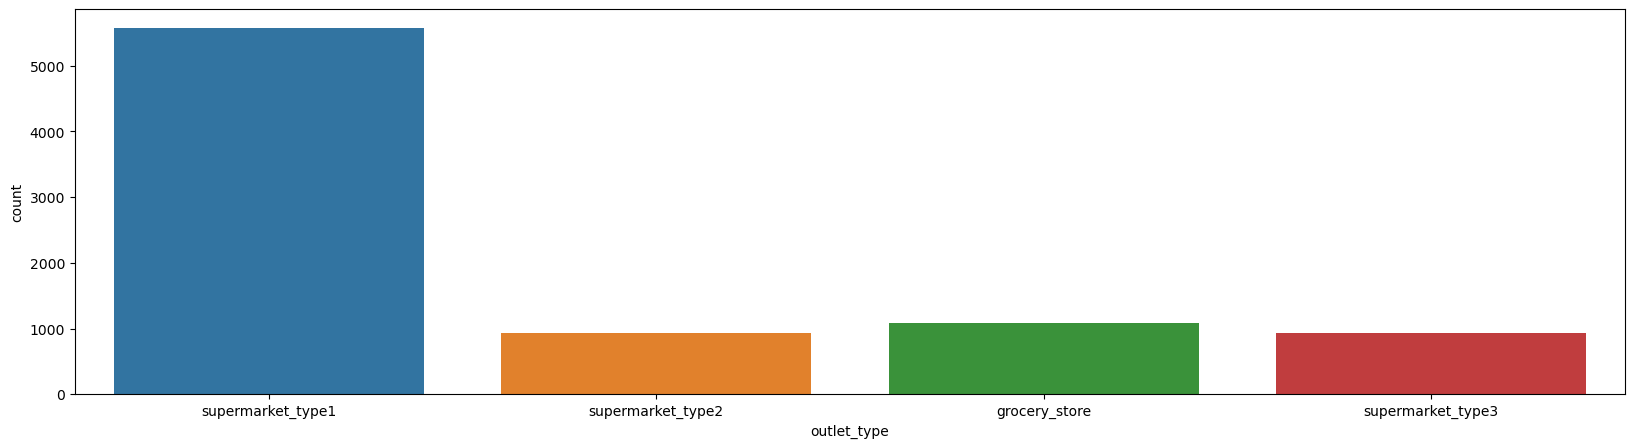

In [28]:
for column in train.select_dtypes('object'):
    plt.figure(figsize=(20,5))
    sns.countplot(x=train[column])
    plt.show()

In [29]:
pd.DataFrame(train.groupby('outlet_type').sum()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_type,
supermarket_type1,1.291734e+07
supermarket_type3,3.453926e+06
supermarket_type2,1.851823e+06
grocery_store,3.680343e+05


In [30]:
pd.DataFrame(train.groupby('outlet_type').mean()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_type,
supermarket_type3,3694.038558
supermarket_type1,2316.181148
supermarket_type2,1995.498739
grocery_store,339.828500


In [31]:
train.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier', 'outlet_size',
       'outlet_location_type', 'outlet_type', 'item_outlet_sales',
       'outlet_age'],
      dtype='object')

In [32]:
pd.DataFrame(train.groupby('outlet_location_type').sum()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_location_type,
tier_3,7.636753e+06
tier_2,6.472314e+06
tier_1,4.482059e+06


In [33]:
pd.DataFrame(train.groupby('outlet_location_type').mean()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_location_type,
tier_2,2323.990559
tier_3,2279.627651
tier_1,1876.909159


In [34]:
pd.DataFrame(train.groupby('outlet_size').sum()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_size,
medium,7.489719e+06
small,4.566212e+06
high,2.142664e+06


In [35]:
pd.DataFrame(train.groupby('outlet_size').mean()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_size,
medium,2681.603542
high,2298.995256
small,1912.149161


In [36]:
pd.DataFrame(train.groupby('outlet_identifier').sum()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_identifier,
out027,3.453926e+06
out035,2.268123e+06
out049,2.183970e+06
out017,2.167465e+06
out013,2.142664e+06
out046,2.118395e+06
out045,2.036725e+06
out018,1.851823e+06
out010,1.883402e+05


In [37]:
pd.DataFrame(train.groupby('outlet_identifier').mean()['item_outlet_sales'].sort_values(ascending=False))

,item_outlet_sales
outlet_identifier,
out027,3694.038558
out035,2438.841866
out049,2348.354635
out017,2340.675263
out013,2298.995256
out046,2277.844267
out045,2192.384798
out018,1995.498739
out019,340.329723


In [38]:
pd.DataFrame(train.groupby(['outlet_type', 'outlet_identifier']).size(), columns=['Size'])

Size
outlet_type       outlet_identifier      
grocery_store     out010              555
                  out019              528
supermarket_type1 out013              932
                  out017              926
                  out035              930
                  out045              929
                  out046              930
                  out049              930
supermarket_type2 out018              928
supermarket_type3 out027              935

In [39]:
train.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier', 'outlet_size',
       'outlet_location_type', 'outlet_type', 'item_outlet_sales',
       'outlet_age'],
      dtype='object')

In [40]:
pd.DataFrame(train.groupby(['outlet_type', 'outlet_size']).size(), columns=['Size'])

Size
outlet_type       outlet_size      
grocery_store     small         528
supermarket_type1 high          932
                  medium        930
                  small        1860
supermarket_type2 medium        928
supermarket_type3 medium        935

In [41]:
pd.DataFrame(train.groupby(['outlet_location_type', 'outlet_type']).size(), columns=['Size'])

Size
outlet_location_type outlet_type            
tier_1               grocery_store       528
                     supermarket_type1  1860
tier_2               supermarket_type1  2785
tier_3               grocery_store       555
                     supermarket_type1   932
                     supermarket_type2   928
                     supermarket_type3   935

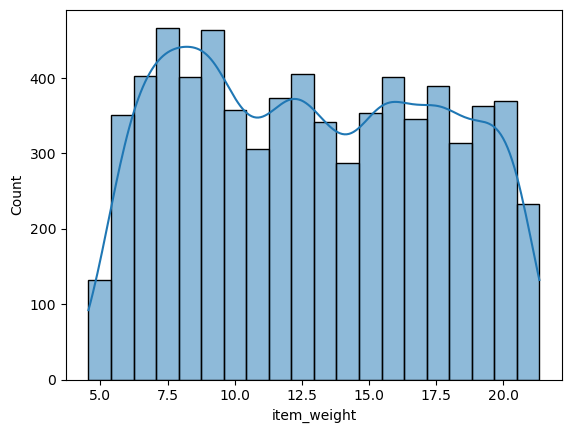

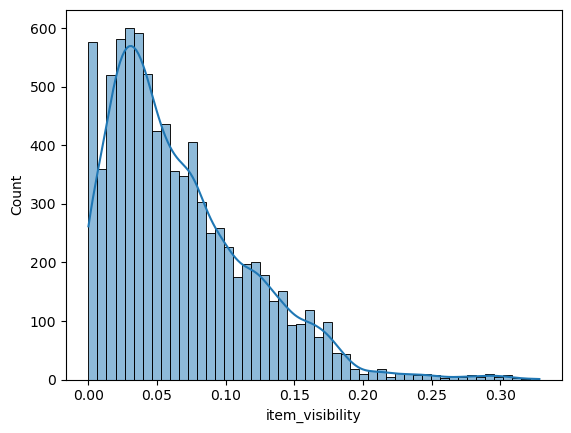

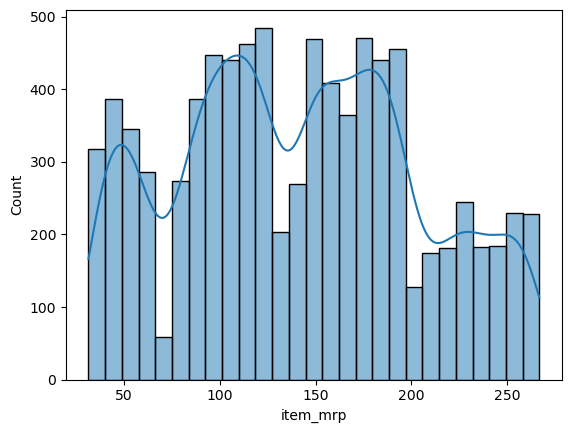

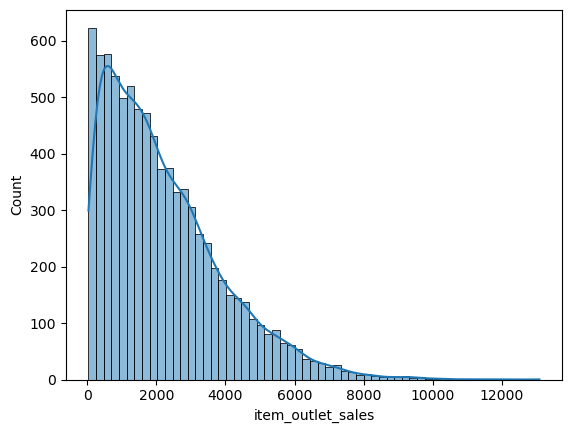

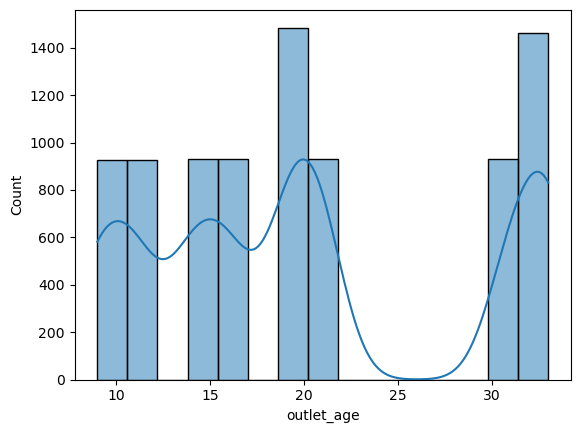

In [42]:
for column in train.select_dtypes(['int64', 'float64']):
    sns.histplot(x=train[column], kde=True)
    plt.show()